In [1]:
import json
import os
import glob
import argparse
import subprocess
import sys
import pickle 
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import libstempo as lst
import libstempo.plot as lstplot
import libstempo.toasim as toasim
from enterprise.pulsar import Pulsar
from numpy import log10 as lg

In [2]:
par="psr.par"; tim="psr_sim.tim"

In [3]:
psr = lst.tempopulsar(parfile=par, timfile=tim, maxobs=60000)

In [4]:
psr_ent = Pulsar(par, tim)

[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 
[observatory.C:272] Warning: Assuming site '7' means 'pks'
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.


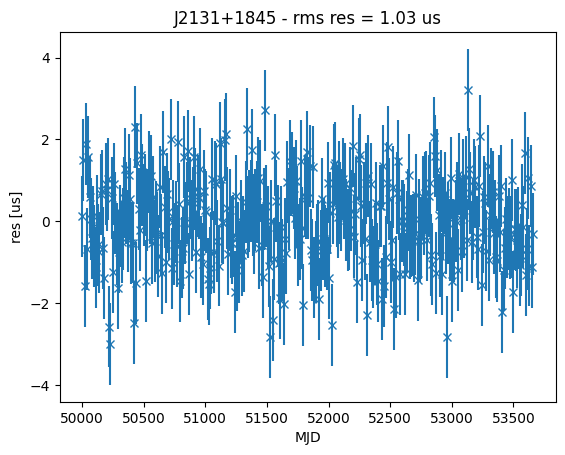

In [5]:
lstplot.plotres(psr, label="Residuals")

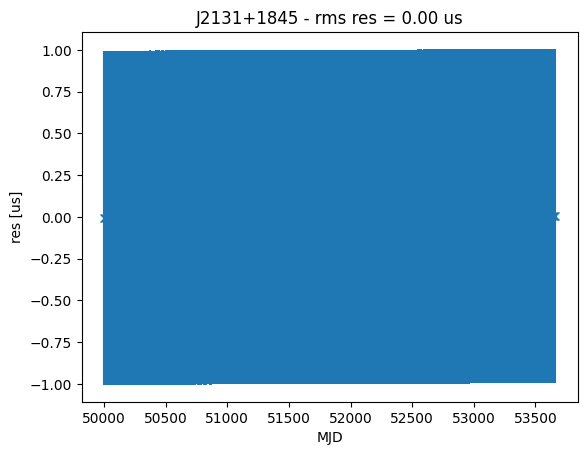

In [6]:
toasim.make_ideal(psr)
lstplot.plotres(psr, label="Residuals")

In [7]:
efac=np.random.uniform(0.8,1.1)
equad=np.random.uniform(-8,-6)
ecorr=np.random.uniform(-8,-6)
RN_Amp=np.random.uniform(-16,-13)
RN_gamma=np.random.uniform(2,6)
gwb_log10_A = lg(2.4e-15)

psrname=psr_ent.name
inj_dict={f"{psrname}_efac":efac,f"{psrname}_log10_equad":equad,f"{psrname}_log10_ecorr":ecorr,f"{psrname}_log10_RN_Amp":RN_Amp,
          f"{psrname}_RN_gamma":RN_gamma,"gwb_log10_A":gwb_log10_A}
inj_dict

{'J2131+1845_efac': 0.8476657575247133,
 'J2131+1845_log10_equad': -7.744079531994308,
 'J2131+1845_log10_ecorr': -6.679366238870169,
 'J2131+1845_log10_RN_Amp': -15.941136204741982,
 'J2131+1845_RN_gamma': 5.769052526031061,
 'gwb_log10_A': -14.619788758288394}

In [8]:
savedir="MPTA_simulation"

if not os.path.exists(savedir):
    os.mkdir(savedir)
    
with open(f"{savedir}/{psrname}_inj_params.dat", "w") as outfile:
    json.dump(inj_dict, outfile, indent=4)

In [9]:
toasim.add_efac(psr, efac)

In [10]:
toasim.add_equad(psr, 10**equad)

In [11]:
toasim.add_jitter(psr, ecorr =10**ecorr,coarsegrain = 1.0/86400.0)

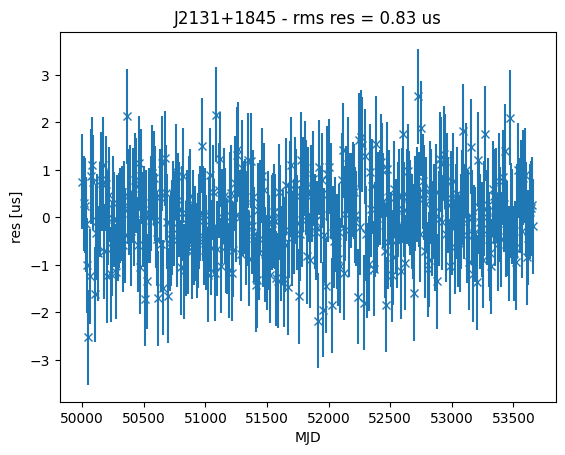

In [12]:
lstplot.plotres(psr, label="Residuals")

In [13]:
tmin = psr_ent.toas.min()
tmax = psr_ent.toas.max()
Tspan = tmax - tmin
1/Tspan


3.162318982560111e-09

In [14]:
toasim.add_rednoise(psr, 10**RN_Amp, RN_gamma,components = 30)

In [15]:
toasim.add_gwb(psr, flow=1e-9, fhigh=1e-7, gwAmp=10**gwb_log10_A)

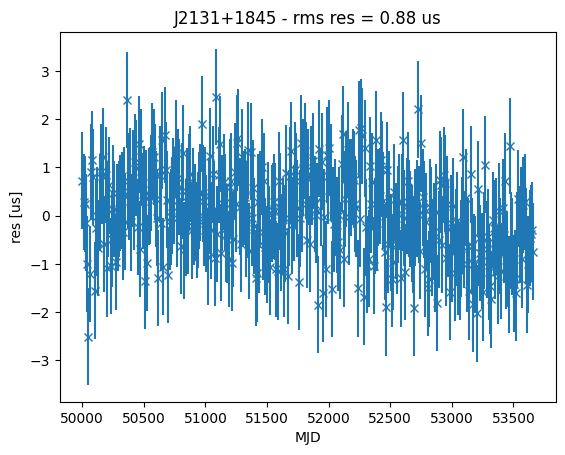

In [16]:
lstplot.plotres(psr, label="Residuals")

In [17]:
psr.fit(iters=3)

(array([-2.03409519e-02,  2.72081084e+02, -1.36428178e-15,  2.76551223e+01,
        -7.88803728e-03,  7.30452880e-02]),
 array([8.87227670e-01, 1.30238674e-09, 3.80796623e-21, 2.56394706e+02,
        7.54750026e-02, 1.02613417e+00]),
 array([[ 7.87172939e-01,  3.00887557e-12,  7.28114614e-25,
         -2.27479776e+02,  1.74361455e-04, -9.10409342e-01],
        [ 3.00887557e-12,  1.69621122e-18,  5.41286133e-31,
         -4.84544216e-11,  9.82974806e-11, -7.98667499e-12],
        [ 7.28114614e-25,  5.41286133e-31,  1.45006068e-41,
          3.78194014e-23,  3.08509011e-23, -2.23206162e-24],
        [-2.27479776e+02, -4.84544216e-11,  3.78194014e-23,
          6.57382455e+04, -2.80565413e-03,  2.63090801e+02],
        [ 1.74361455e-04,  9.82974806e-11,  3.08509011e-23,
         -2.80565413e-03,  5.69647601e-03, -4.62831417e-04],
        [-9.10409342e-01, -7.98667499e-12, -2.23206162e-24,
          2.63090801e+02, -4.62831417e-04,  1.05295133e+00]]),
 1043.9977854049546331)

In [18]:
print("Writing simulated data for", psr.name)
psr.savepar(f"{savedir}/{psr.name}_sim.par")
psr.savetim(f"{savedir}/{psr.name}_sim.tim")
lst.purgetim(f"{savedir}/{psr.name}_sim.tim")

Writing simulated data for J2131+1845


Results for PSR J2131+1845


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 1.684 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       5.63312828672321          5.63312828672321          0             0             N
RAJ (hms)       21:31:01.0743084          21:31:01.0743084          0             0            
DECJ (rad)      0.327312914444174         0.327312914444174         0             0             N
DECJ (dms)      18:45:13.13488            18:45:13.13488            0             0            
F0 (s^-1)       272.081084266634          272.081084266507          1.3024e-09    -1.2756e-10   Y
F1 (s^-2)       -1.3642